<h1>AI Football Manager, part 2<h1>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

<h3>Merging FIFA and Premier League (EPL) </h3>
<li>First we had to cleanup our files, such as for instance remove the accents from foreign names so the player info can match</li>
<li>We then create new csv files containing, for each player, both the physical ratings as well as the real-life statistics, in other words the actual performance of the player</li>

In [30]:
import unicodedata
def strip_accents(text):
    return ''.join(char for char in
                   unicodedata.normalize('NFKD', text)
                   if unicodedata.category(char) != 'Mn')

In [31]:
def fix_data(df):
    df['name'] = df['name'].apply(lambda x: x.strip())
    df['name'] = df['name'].apply(lambda x: strip_accents(x))
    df = df.drop_duplicates(subset='name')
    #df = df.set_index('name')
    return df

In [32]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [33]:
df2016 = pd.read_csv('fifa_player_dataset_2016.csv', encoding='ISO-8859-1')
df2016= fix_data(df2016)

df2017 = pd.read_csv('fifa_player_dataset_2017.csv', encoding='ISO-8859-1')
df2017= fix_data(df2017)

df2018 = pd.read_csv('fifa_player_dataset_2018.csv', encoding='ISO-8859-1')
df2018= fix_data(df2018)

df2019 = pd.read_csv('fifa_player_dataset_2019.csv', encoding='ISO-8859-1')
df2019= fix_data(df2019)

In [34]:
gk2016 = pd.read_csv('2015_16_GOALKEEPER_stats.csv', encoding='ISO-8859-1', index_col= False)
gk2016 = fix_data(gk2016)

gk2017 = pd.read_csv('2016_17_GOALKEEPER_stats.csv', encoding='ISO-8859-1', index_col= False)
gk2017 = fix_data(gk2017)

gk2018 = pd.read_csv('2017_18_GOALKEEPER_stats.csv', encoding='ISO-8859-1', index_col= False)
gk2018 = fix_data(gk2018)

gk2019 = pd.read_csv('2018_19_GOALKEEPER_stats.csv', encoding='ISO-8859-1', index_col= False)
gk2019 = fix_data(gk2019)

In [35]:
def2016 = pd.read_csv('2015_16_DEFENDER_stats.csv', encoding='ISO-8859-1', index_col= False)
def2016 = fix_data(def2016)

def2017 = pd.read_csv('2016_17_DEFENDER_stats.csv', encoding='ISO-8859-1', index_col= False)
def2017 = fix_data(def2017)

def2018 = pd.read_csv('2017_18_DEFENDER_stats.csv', encoding='ISO-8859-1', index_col= False)
def2018 = fix_data(def2018)

def2019 = pd.read_csv('2018_19_DEFENDER_stats.csv', encoding='ISO-8859-1', index_col= False)
def2019 = fix_data(def2019)

In [36]:
mid2016 = pd.read_csv('2015_16_MIDFIELDER_stats.csv', encoding='ISO-8859-1', index_col= False)
mid2016 = fix_data(mid2016)

mid2017 = pd.read_csv('2016_17_MIDFIELDER_stats.csv', encoding='ISO-8859-1', index_col= False)
mid2017 = fix_data(mid2017)

mid2018 = pd.read_csv('2017_18_MIDFIELDER_stats.csv', encoding='ISO-8859-1', index_col= False)
mid2018 = fix_data(mid2018)

mid2019 = pd.read_csv('2018_19_MIDFIELDER_stats.csv', encoding='ISO-8859-1', index_col= False)
mid2019 = fix_data(mid2019)

In [37]:
fw2016 = pd.read_csv('2015_16_FORWARD_stats.csv', encoding='ISO-8859-1', index_col= False)
fw2016 = fix_data(fw2016)

fw2017 = pd.read_csv('2016_17_FORWARD_stats.csv', encoding='ISO-8859-1', index_col= False)
fw2017 = fix_data(fw2017)

fw2018 = pd.read_csv('2017_18_FORWARD_stats.csv', encoding='ISO-8859-1', index_col= False)
fw2018 = fix_data(fw2018)

fw2019 = pd.read_csv('2018_19_FORWARD_stats.csv', encoding='ISO-8859-1', index_col= False)
fw2019 = fix_data(fw2019)

In [38]:
keeper = ['GK']
defend = ['CB', 'LB', 'RB', 'RWB', 'LWB']
midfield = ['CDM', 'CM', 'CAM', 'RM', 'RW', 'LM', 'LW']
attack = ['CF', 'ST', 'RF', 'LF']

In [39]:
def create_positions(data, position_list):
    condition = np.zeros(len(data), dtype=bool)
    for position in position_list:
        condition = condition | (data['position'] == position)
    return data[condition]

In [40]:
goalkeeper2016 = create_positions(df2016, keeper)
defender2016 = create_positions(df2016, defend)
midfielder2016 = create_positions(df2016, midfield)
forward2016 = create_positions(df2016, attack)

In [41]:
goalkeeper2017 = create_positions(df2017, keeper)
defender2017 = create_positions(df2017, defend)
midfielder2017 = create_positions(df2017, midfield)
forward2017 = create_positions(df2017, attack)

In [42]:
goalkeeper2018 = create_positions(df2018, keeper)
defender2018 = create_positions(df2018, defend)
midfielder2018 = create_positions(df2018, midfield)
forward2018 = create_positions(df2018, attack)

In [43]:
goalkeeper2019 = create_positions(df2019, keeper)
defender2019 = create_positions(df2019, defend)
midfielder2019 = create_positions(df2019, midfield)
forward2019 = create_positions(df2019, attack)

In [47]:
def similar_names(df, merged):
    #df = df.reset_index()
    #merged = merged.reset_index()
    df_names = df['name']
    merged_names = merged['name']
    for index,name in merged_names.iteritems():
        for second_name in df_names:
            if similar(name, second_name) > 0.5:
                if name.split(' ')[-1] == second_name.split(' ')[-1]:
                    merged_names[index] = second_name
                break
    #df = df.set_index('name')
    return merged

In [53]:
gk2016 = similar_names(goalkeeper2016, gk2016)
gk2017 = similar_names(goalkeeper2017, gk2017)
gk2018 = similar_names(goalkeeper2018, gk2018)
gk2019 = similar_names(goalkeeper2019, gk2019)

goalkeeper_2016 = pd.merge(goalkeeper2016, gk2016, on = 'name')
goalkeeper_2017 = pd.merge(goalkeeper2017, gk2017, on = 'name')
goalkeeper_2018 = pd.merge(goalkeeper2018, gk2018, on = 'name')
goalkeeper_2019 = pd.merge(goalkeeper2019, gk2019, on = 'name')

In [55]:
def2016 = similar_names(defender2016, def2016)
def2017 = similar_names(defender2017, def2017)
def2018 = similar_names(defender2018, def2018)
def2019 = similar_names(defender2019, def2019)

defender_2016 = pd.merge(defender2016, def2016, on = 'name')
defender_2017 = pd.merge(defender2017, def2017, on = 'name')
defender_2018 = pd.merge(defender2018, def2018, on = 'name')
defender_2019 = pd.merge(defender2019, def2019, on = 'name')

In [56]:
mid2016 = similar_names(midfielder2016, mid2016)
mid2017 = similar_names(midfielder2017, mid2017)
mid2018 = similar_names(midfielder2018, mid2018)
mid2019 = similar_names(midfielder2019, mid2019)

midfielder_2016 = pd.merge(midfielder2016, mid2016, on = 'name')
midfielder_2017 = pd.merge(midfielder2017, mid2017, on = 'name')
midfielder_2018 = pd.merge(midfielder2018, mid2018, on = 'name')
midfielder_2019 = pd.merge(midfielder2019, mid2019, on = 'name')

In [57]:
fw2016 = similar_names(forward2016, fw2016)
fw2017 = similar_names(forward2017, fw2017)
fw2018 = similar_names(forward2018, fw2018)
fw2019 = similar_names(forward2019, fw2019)

forward_2016 = pd.merge(forward2016, fw2016, on = 'name')
forward_2017 = pd.merge(forward2017, fw2017, on = 'name')
forward_2018 = pd.merge(forward2018, fw2018, on = 'name')
forward_2019 = pd.merge(forward2019, fw2019, on = 'name')

In [92]:
forward_2016.to_csv('forward_2016.csv')
forward_2017.to_csv('forward_2017.csv')
forward_2018.to_csv('forward_2018.csv')
forward_2019.to_csv('forward_2019.csv')

In [93]:
midfielder_2016.to_csv('midfielder_2016.csv')
midfielder_2017.to_csv('midfielder_2017.csv')
midfielder_2018.to_csv('midfielder_2018.csv')
midfielder_2019.to_csv('midfielder_2019.csv')

In [94]:
defender_2016.to_csv('defender_2016.csv')
defender_2017.to_csv('defender_2017.csv')
defender_2018.to_csv('defender_2018.csv')
defender_2019.to_csv('defender_2019.csv')

In [95]:
goalkeeper_2016.to_csv('goalkeeper_2016.csv')
goalkeeper_2017.to_csv('goalkeeper_2017.csv')
goalkeeper_2018.to_csv('goalkeeper_2018.csv')
goalkeeper_2019.to_csv('goalkeeper_2019.csv')

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [4]:
players_2019 = pd.read_csv('fifa_player_dataset_2019.csv' , encoding='ISO-8859-1')
players_2018 = pd.read_csv('fifa_player_dataset_2018.csv', encoding='ISO-8859-1')
players_2017 = pd.read_csv('fifa_player_dataset_2017.csv', encoding='ISO-8859-1')
players_2016 = pd.read_csv('fifa_player_dataset_2016.csv', encoding='ISO-8859-1')

In [5]:
important_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality', 'rating']

In [6]:
keeper = ['GK']
defend = ['CB', 'LB', 'RB', 'RWB', 'LWB']
midfield = ['CDM', 'CM', 'CAM', 'RM', 'RW', 'LM', 'LW']
attack = ['CF', 'ST', 'RF', 'LF']

def create_positions(data, position_list):
    condition = np.zeros(len(data), dtype=bool)
    for position in position_list:
        condition = condition | (data['position'] == position)
    return data[condition]


In [7]:
goalkeeper_2016 = create_positions(players_2016, keeper)
defender_2016 = create_positions(players_2016, defend)
midfielder_2016 = create_positions(players_2016, midfield)
attacker_2016 = create_positions(players_2016, attack)

goalkeeper_2017 = create_positions(players_2017, keeper)
defender_2017 = create_positions(players_2017, defend)
midfielder_2017 = create_positions(players_2017, midfield)
attacker_2017 = create_positions(players_2017, attack)

goalkeeper_2018 = create_positions(players_2018, keeper)
defender_2018 = create_positions(players_2018, defend)
midfielder_2018 = create_positions(players_2018, midfield)
attacker_2018 = create_positions(players_2018, attack)

goalkeeper_2019 = create_positions(players_2019, keeper)
defender_2019 = create_positions(players_2019, defend)
midfielder_2019 = create_positions(players_2019, midfield)
attacker_2019 = create_positions(players_2019, attack)

<h1> Distribution of Player Ratings </h1>
<li>Our objective here was to find interesting properties about the distributions of the FIFA avatars' ratings</li>
<li>In the folowing graphs, we first plot the main attributes of all the players, and observe their distribution:</li>
<li>We decided to focus on six attributes: Pace, Shooting, Passing, Dribbling, Defending and Physicality</li>
<li>We also wanted to know our of the four classes of players (goallie, defender, midfielder and forward) what were the main characteristic or strenghts of each class relative to the whole lot of players</li>
<li>We did the same visualizations for every FIFA game iteration individually</li>

In [8]:
def graph_fifa_stats(data, COL_NUM = 2, ROW_NUM = 4 ):
    import matplotlib.pyplot as plt
    from scipy import stats
    %matplotlib inline
    
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    
    for i , column in enumerate(important_columns):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        sns.distplot(data[column], ax=ax)
        ax.set_title(column+ ' Distribution')
        plt.tight_layout()
    

In [9]:
def graph_fifa_stats_overlap(data,data2, COL_NUM = 2, ROW_NUM = 4 ):
    import matplotlib.pyplot as plt
    from scipy import stats
    %matplotlib inline
    important_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality', 'rating']
    
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    
    for i , column in enumerate(important_columns):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        sns.distplot(data[column], ax=ax)
        sns.distplot(data2[column], ax=ax)
        ax.set_title(column+ ' Distribution')
        plt.tight_layout()

<h2> FIFA 2016 </h2>

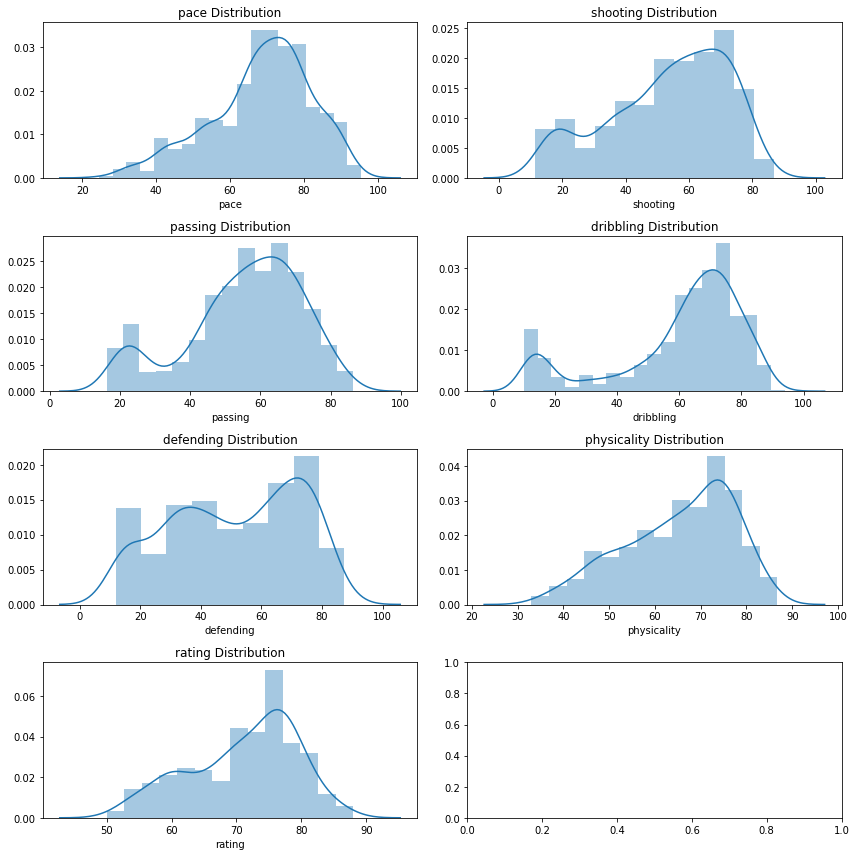

In [22]:
graph_fifa_stats(players_2016)

<li>From this we can see that the data isn't exactly normally distributed, but this is fine (and it's real life anyway)</li>

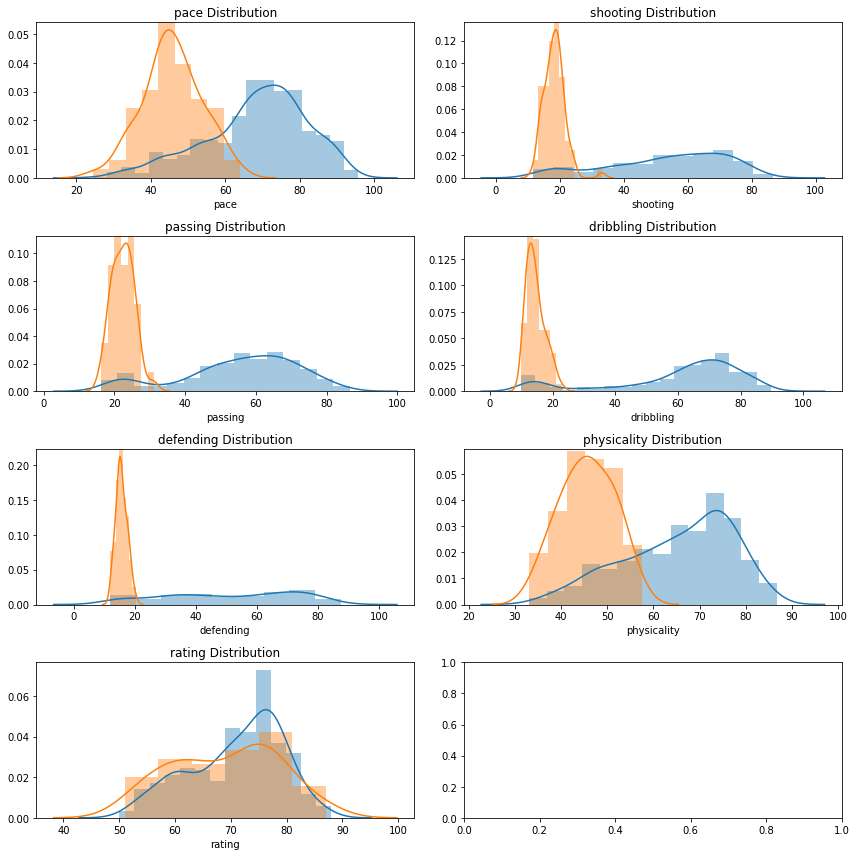

In [23]:
graph_fifa_stats_overlap(players_2016, data2=goalkeeper_2016)

<h4>Indeed, typical of goalkeepers is that they are not very technical with the ball</h4>

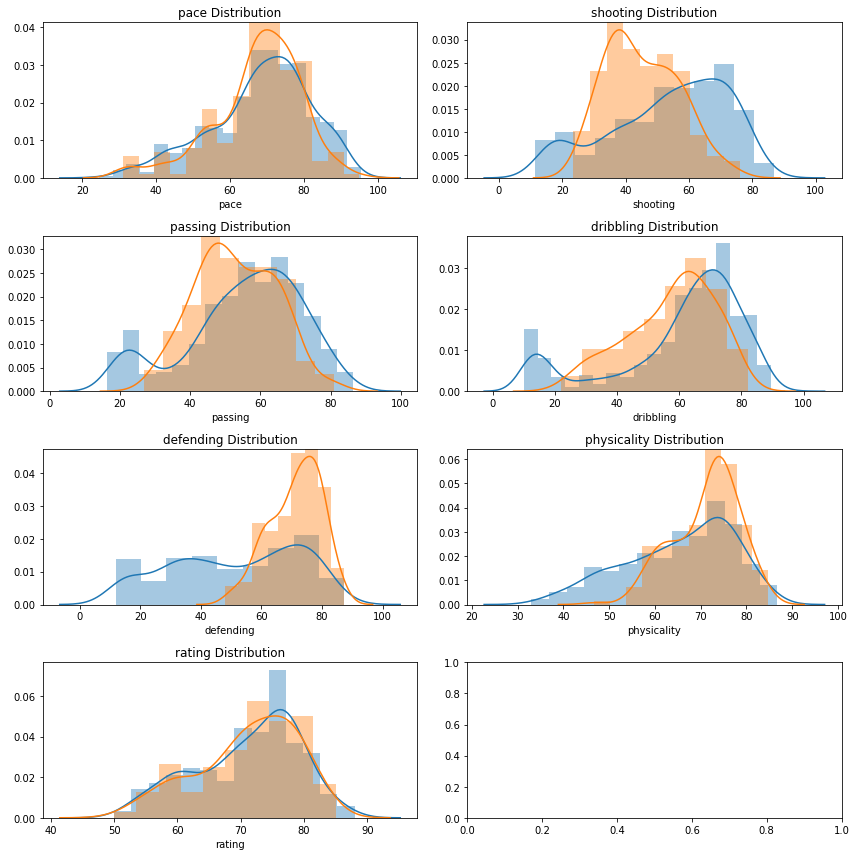

In [24]:
graph_fifa_stats_overlap(players_2016, data2=defender_2016)

<h4>From this for instance we can see that defenders typically have stronger bodies than the average, but are weaker at shooting</h4>

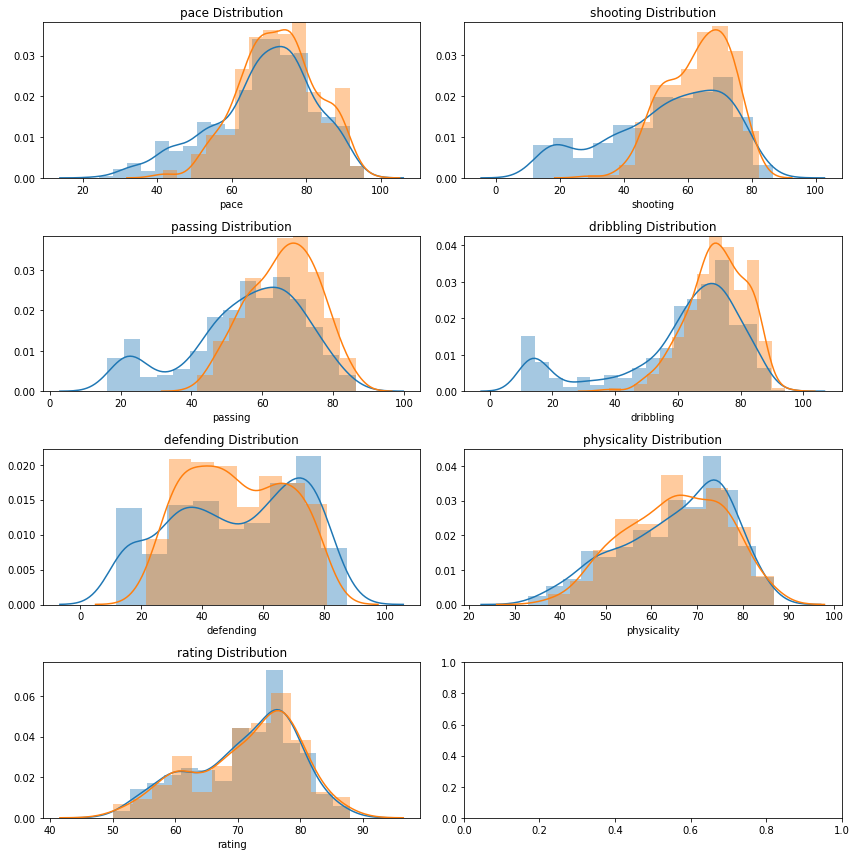

In [25]:
graph_fifa_stats_overlap(players_2016, data2=midfielder_2016)

<h4>Midfielders are the most technically strong players, because of their high passing and dribbling distributions</h4>

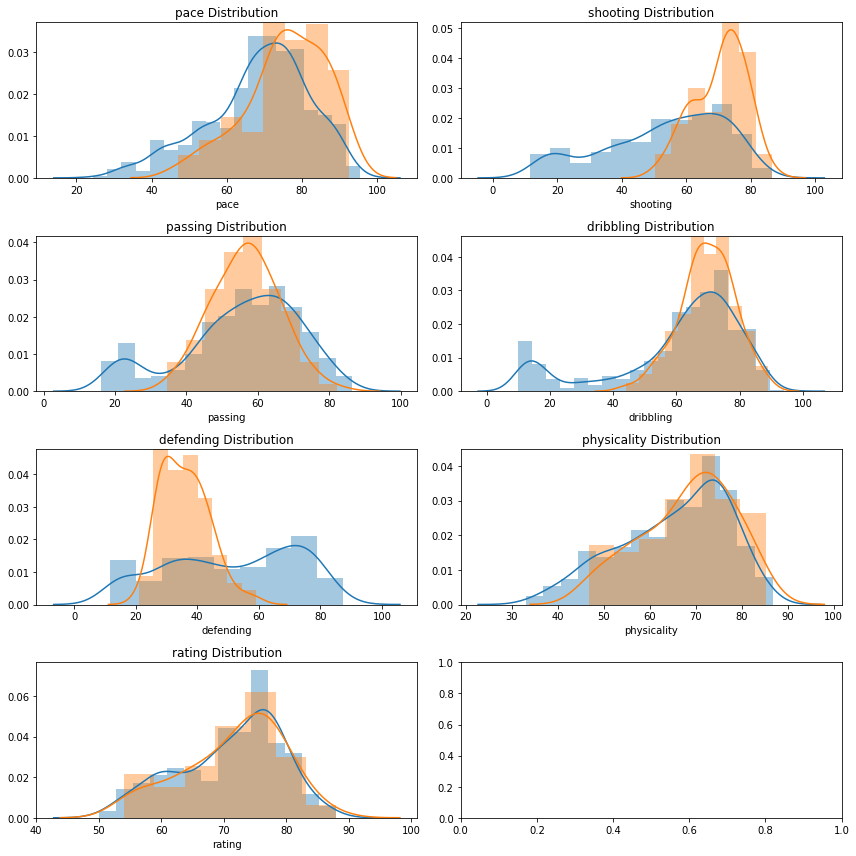

In [26]:
graph_fifa_stats_overlap(players_2016, data2=attacker_2016)

<h4>Finally, forwards have the best shooting and pace, but the lowest defensive statistics (this seems obvious when you watch the sport in real life but we found that it translates nicely into the FIFA games as well!) </h4>
<li>We did the same for the three following versions of FIFA but found nothing abnormally different from FIFA 16</li>|

<h2> FIFA 2017 </h2>

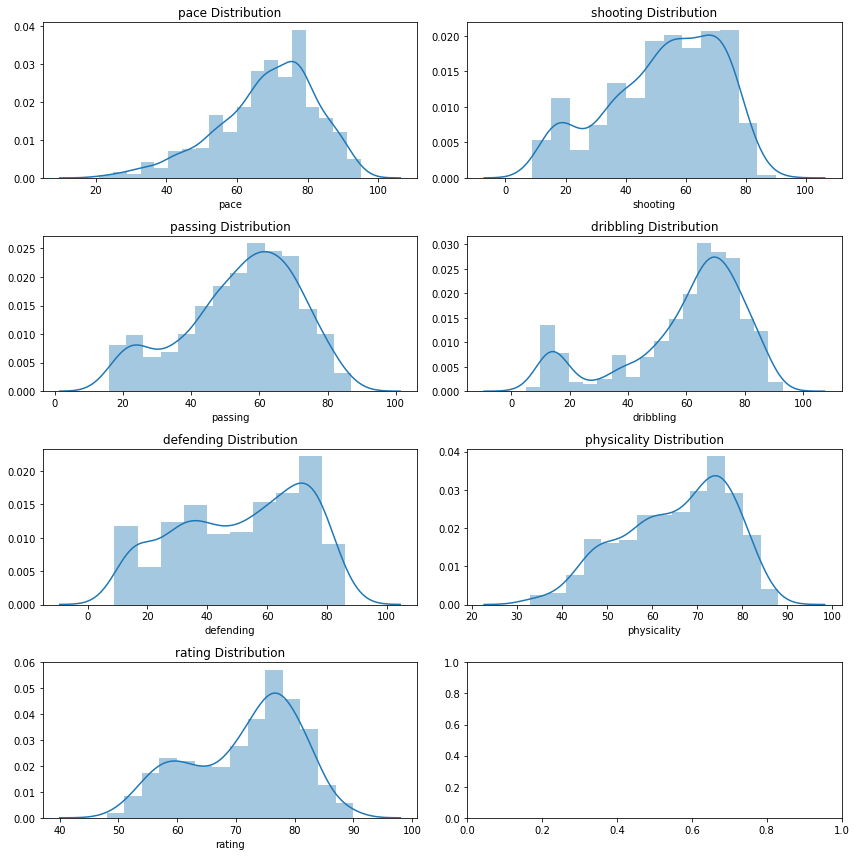

In [27]:
graph_fifa_stats(players_2017)

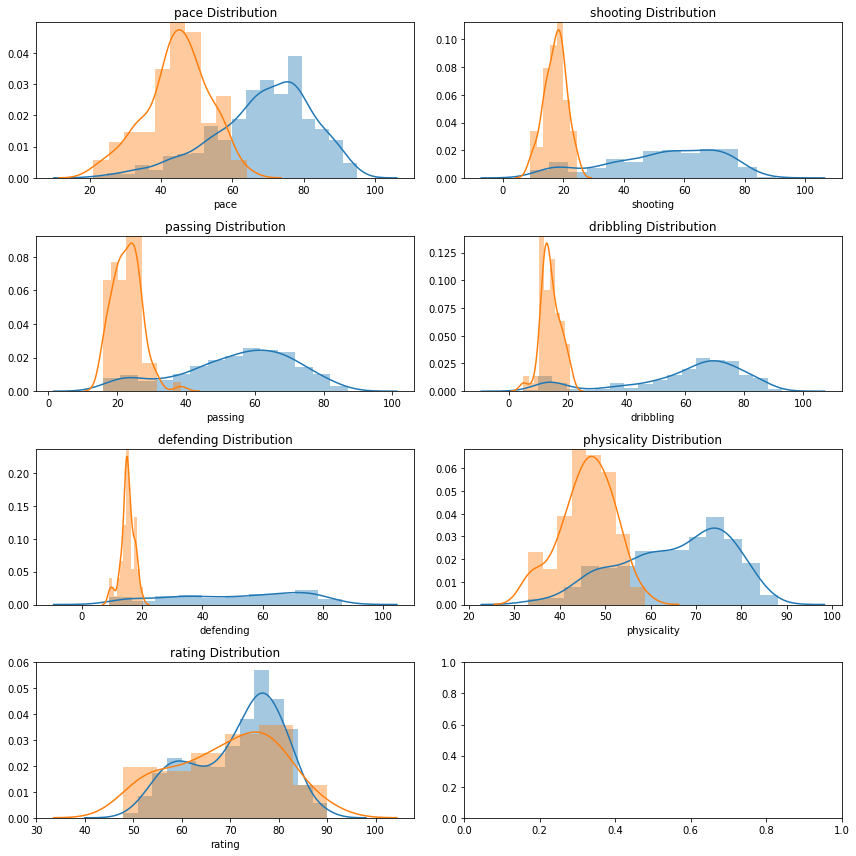

In [28]:
graph_fifa_stats_overlap(players_2017, data2=goalkeeper_2017)

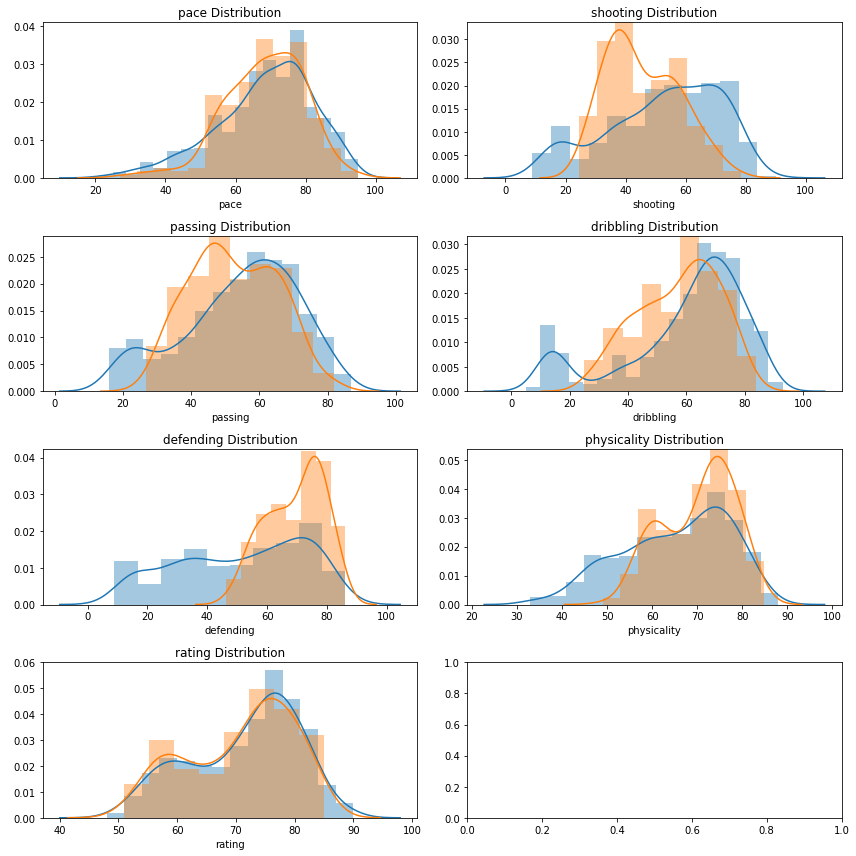

In [29]:
graph_fifa_stats_overlap(players_2017, data2=defender_2017)

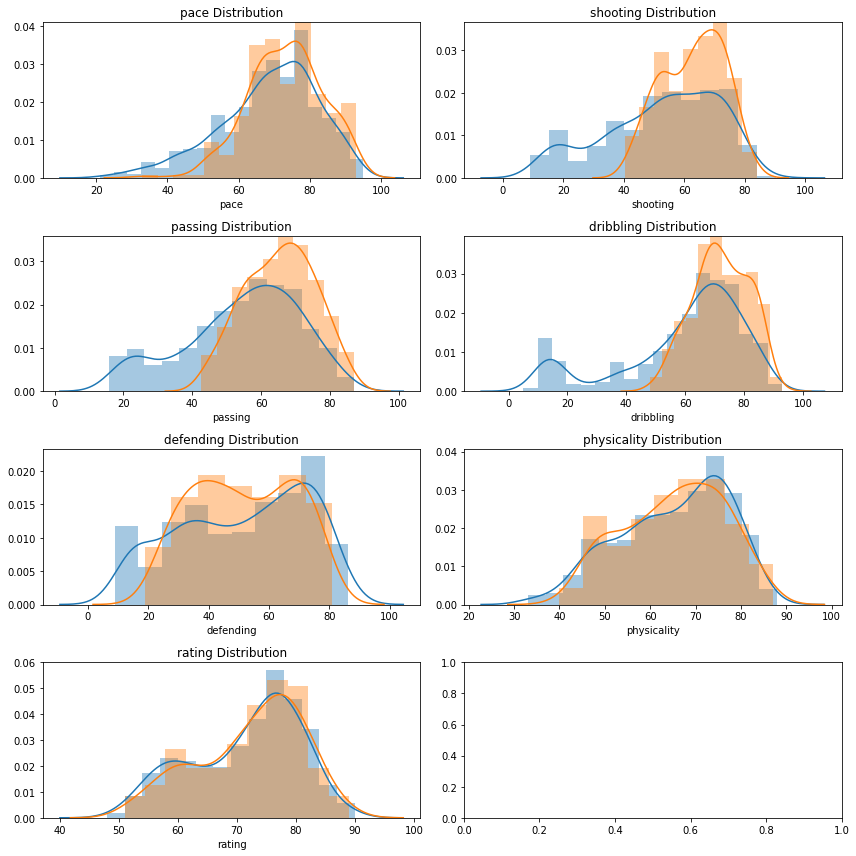

In [30]:
graph_fifa_stats_overlap(players_2017, data2=midfielder_2017)

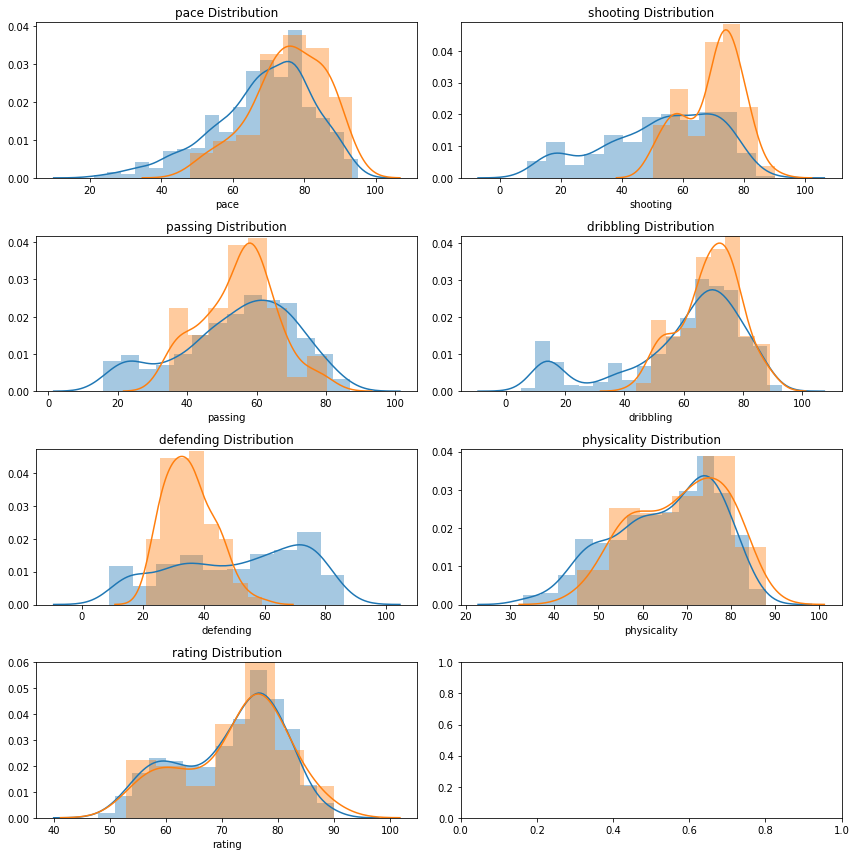

In [31]:
graph_fifa_stats_overlap(players_2017, data2=attacker_2017)

<h2> FIFA 2018 </h2>

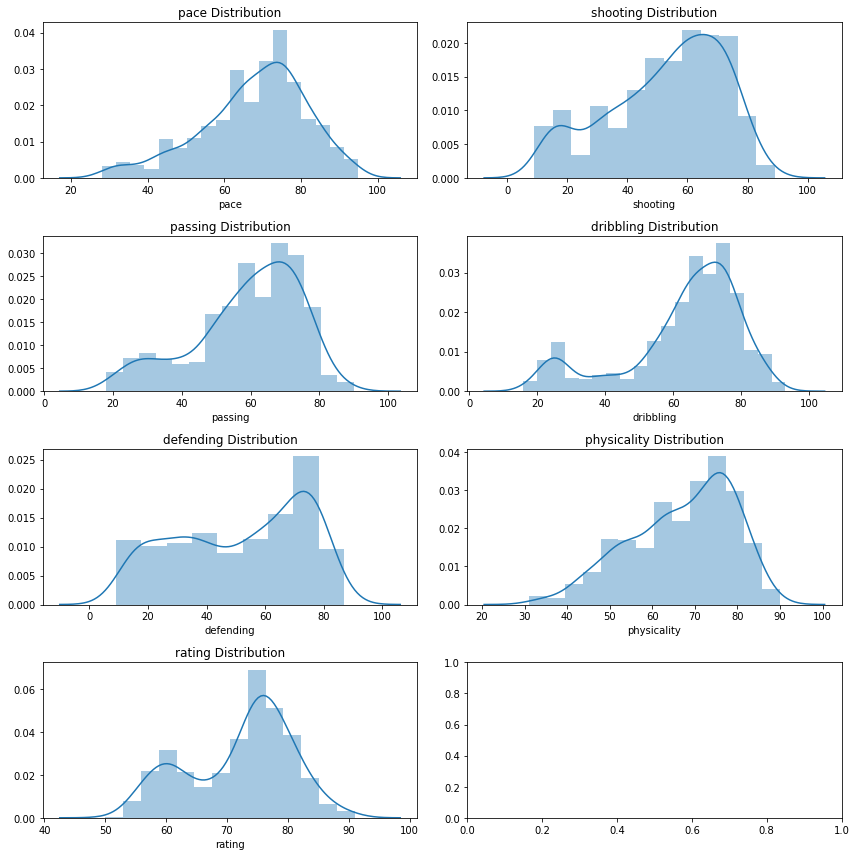

In [32]:
graph_fifa_stats(players_2018)

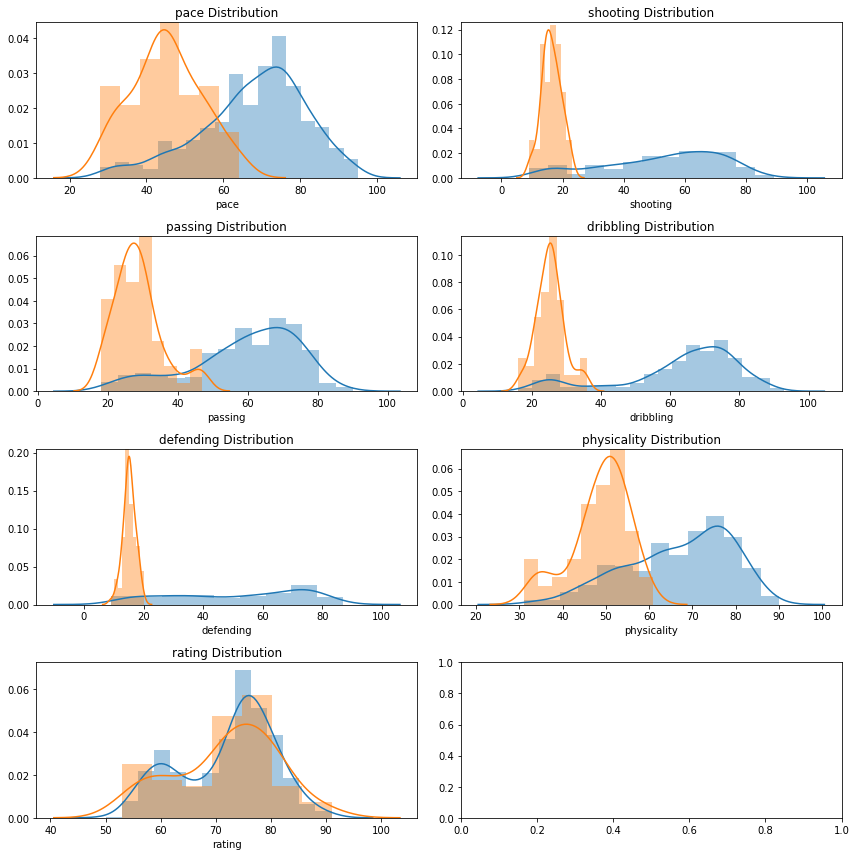

In [33]:
graph_fifa_stats_overlap(players_2018, data2=goalkeeper_2018)

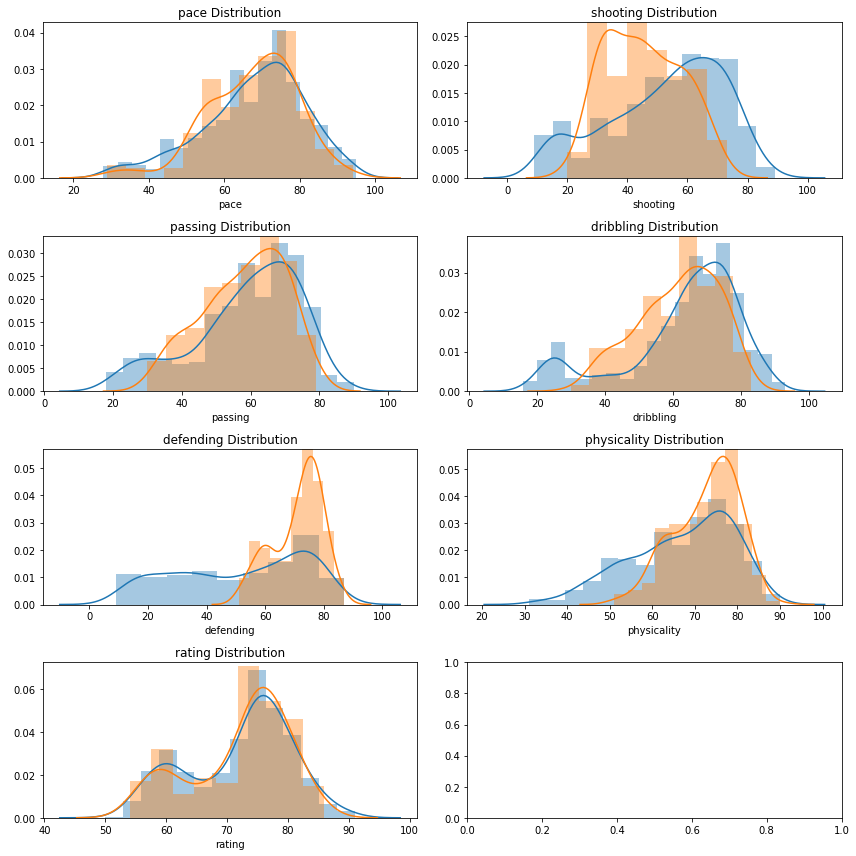

In [34]:
graph_fifa_stats_overlap(players_2018, data2=defender_2018)

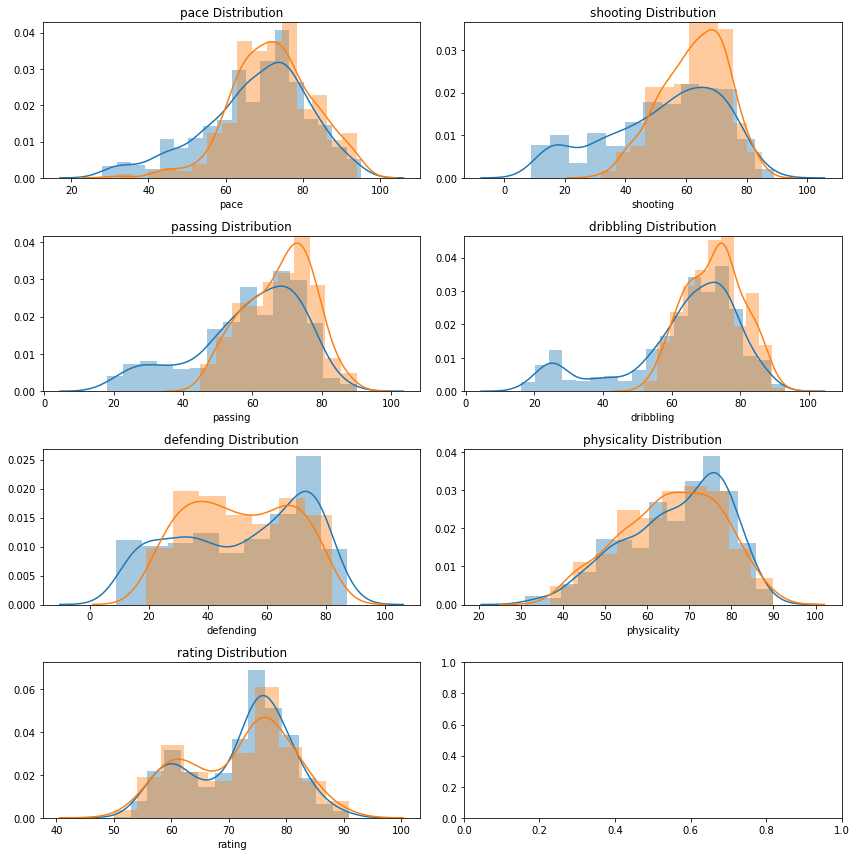

In [35]:
graph_fifa_stats_overlap(players_2018, data2=midfielder_2018)

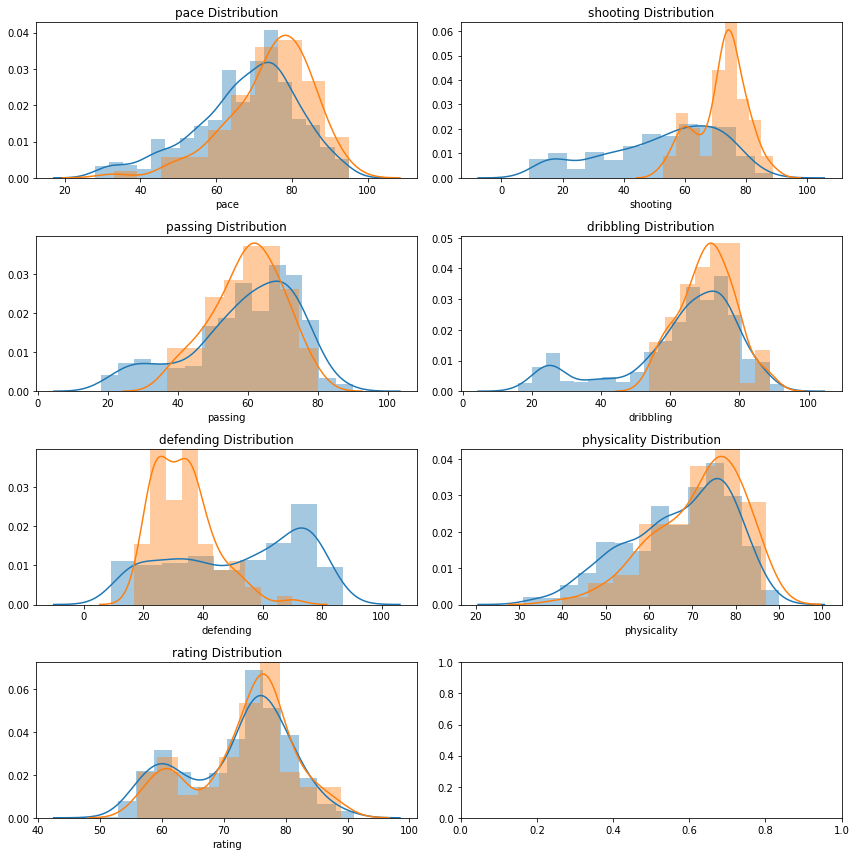

In [36]:
graph_fifa_stats_overlap(players_2018, data2=attacker_2018)

<h2> FIFA 2019 </h2>

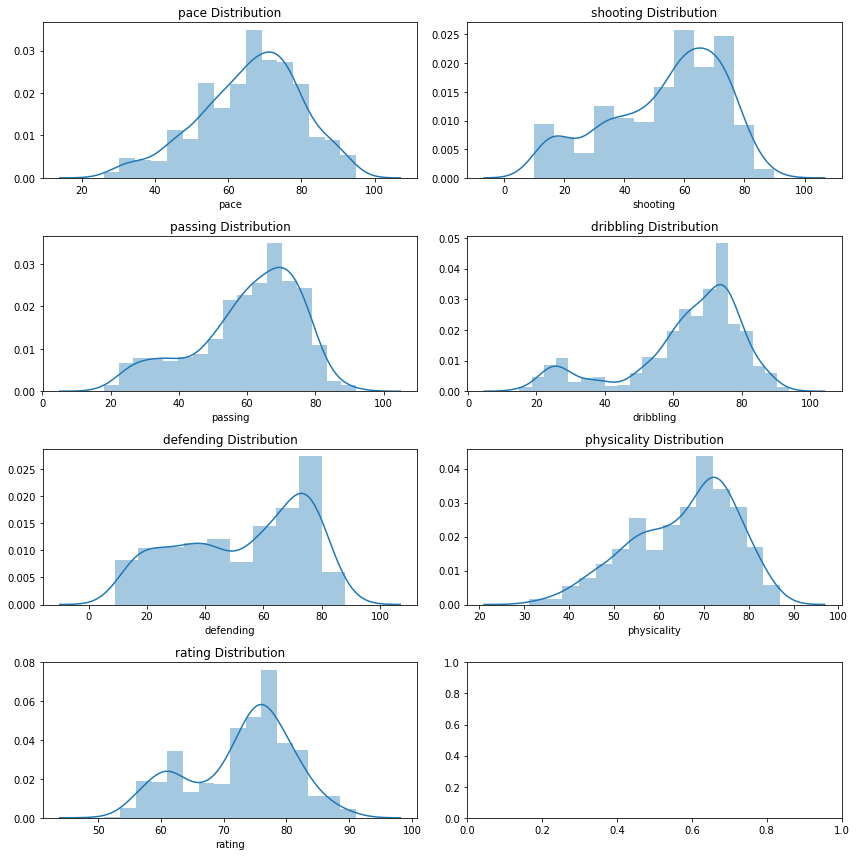

In [37]:
graph_fifa_stats(players_2019)

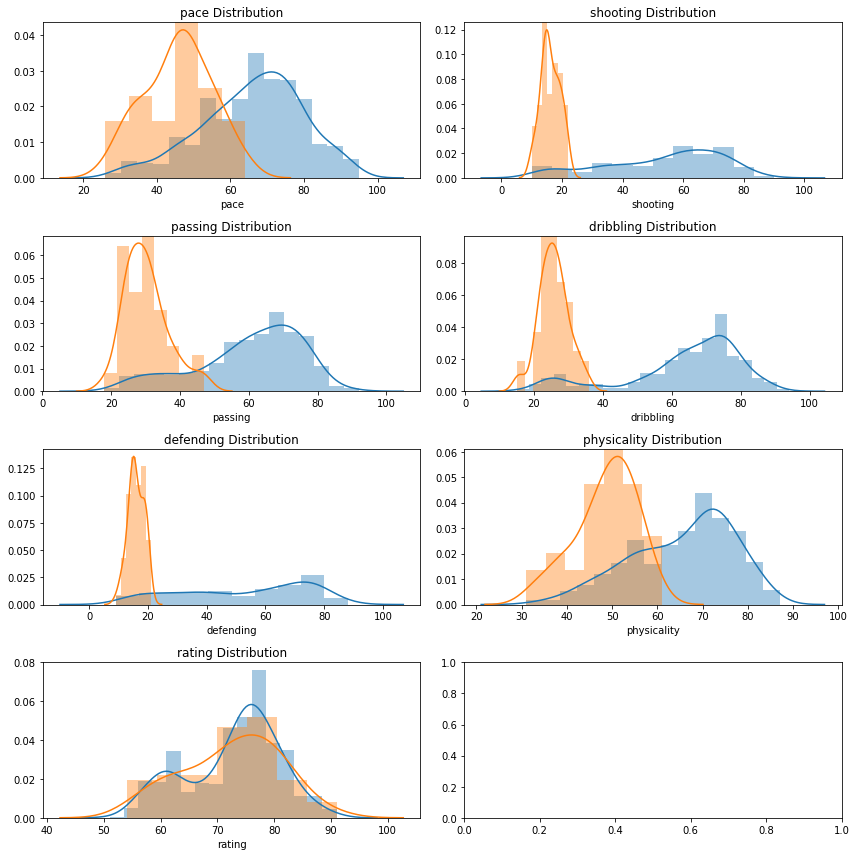

In [38]:
graph_fifa_stats_overlap(players_2019, data2=goalkeeper_2019)

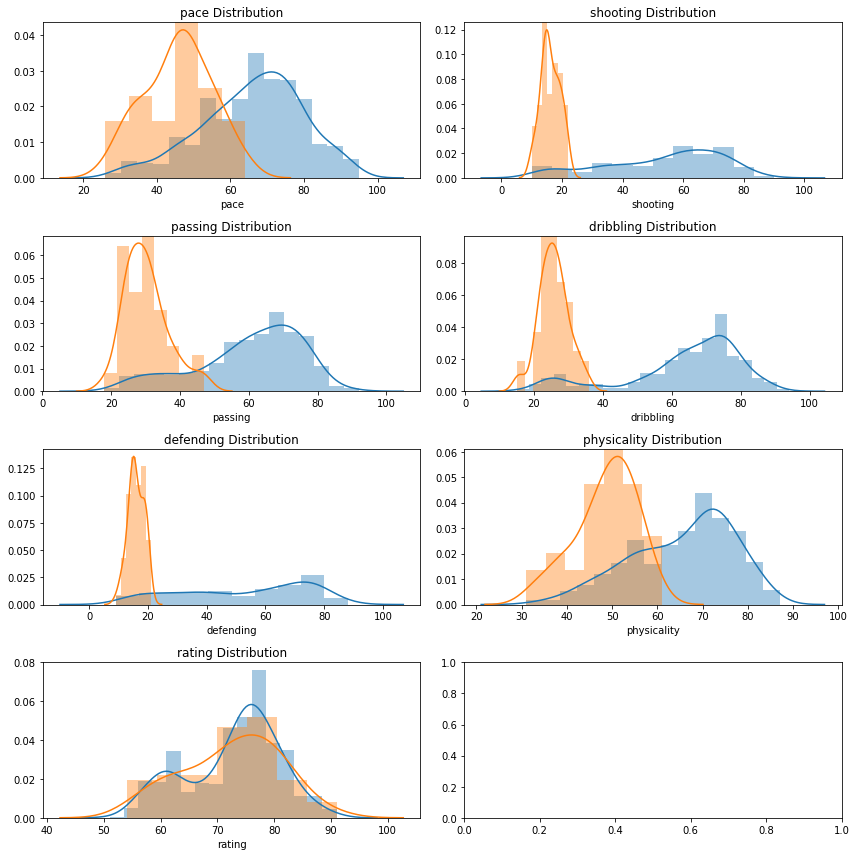

In [39]:
graph_fifa_stats_overlap(players_2019, data2=goalkeeper_2019)

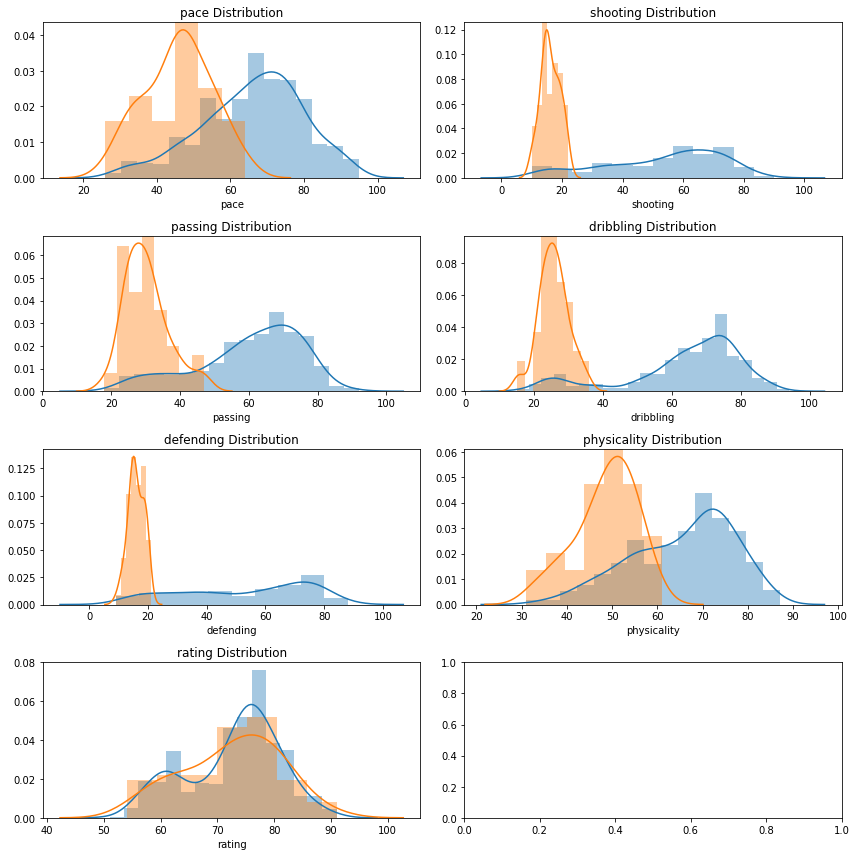

In [40]:
graph_fifa_stats_overlap(players_2019, data2=goalkeeper_2019)

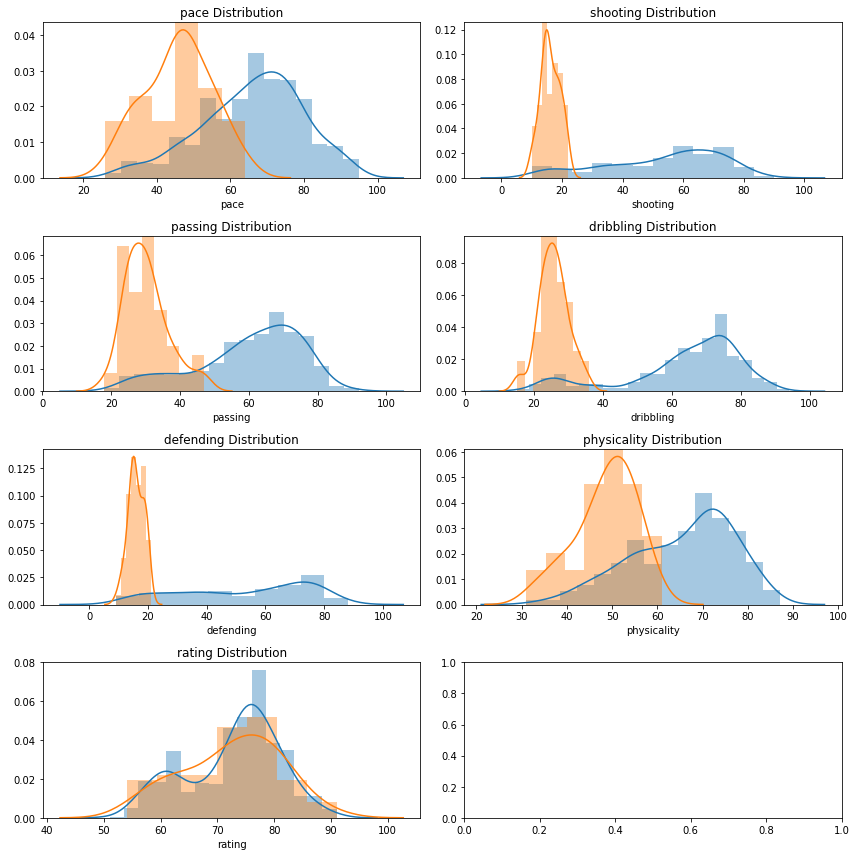

In [41]:
graph_fifa_stats_overlap(players_2019, data2=goalkeeper_2019)

<h1> FIFA 19 TEAM STATS </h1>

In [42]:
def team_averages(fifa_stat):
    fifa_stat['team'] = fifa_stat['team'].apply(lambda x: x.strip())
    team_array = fifa_stat['team'].unique()
    
    team_list = list()
    for team in team_array:
        team_list.append((team, fifa_stat[fifa_stat['team']==team]))
        
    averages_by_team = list()
    for (team, stats) in team_list:
        averages_by_team.append((team, stats['rating'].mean(), stats['pace'].mean(), stats['shooting'].mean(),
                                stats['passing'].mean(), stats['dribbling'].mean(), stats['defending'].mean(),
                                stats['physicality'].mean(),))
    
    team_averages= pd.DataFrame(averages_by_team, columns=['team','rating','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality'])
    df = pd.DataFrame(averages_by_team, columns=['team','rating','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality'])
    df = df.set_index('team')
    return df

In [43]:
def team_graphs(team_data, COL_NUM=2, ROW_NUM=4):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    columns=['rating','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality']

    for i, column_name in enumerate(columns): 
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        data = team_data[column_name]
        data = data.sort_values(ascending=False)[:5] 
        data.plot(kind='barh', ax=ax) #bar histogram
        ax.set_title(column_name)
        ax.set_xlim(50,80)
        
    plt.tight_layout() 

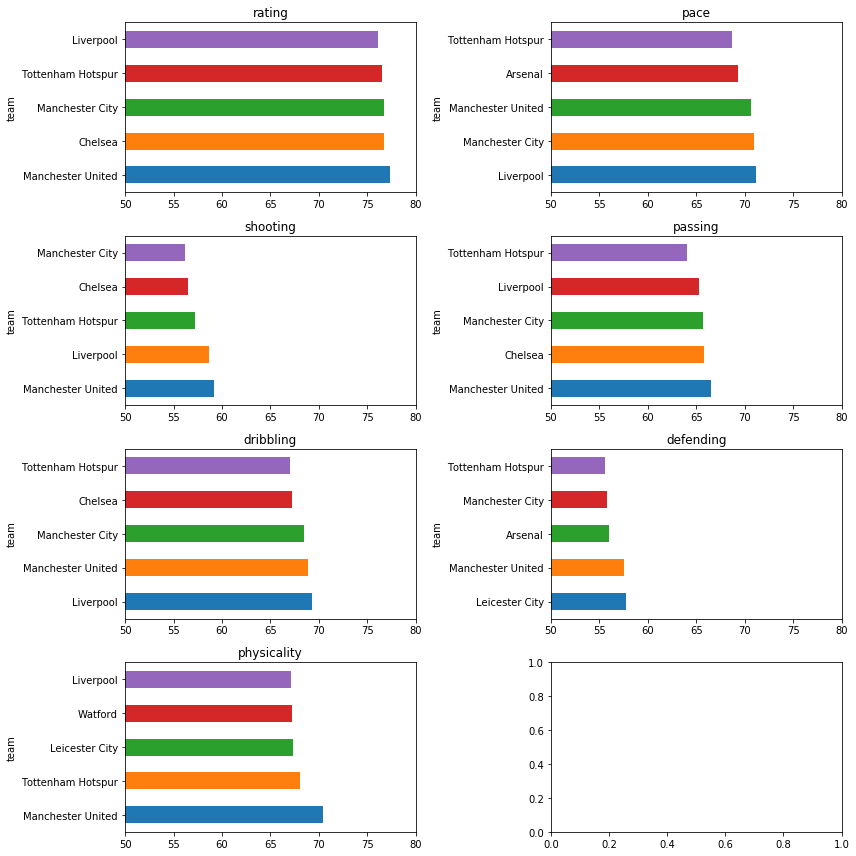

In [44]:
team_19 = team_averages(players_2019)
team_graphs(team_19)

<h4>We can also look at per-team ratings:</h4>
<li>Interesting to note that Manchester United, the team that on paper for FIFA 19 is the strongest team, is currently ranked 8th in the Premier League table. Talk about "overrated"!</li>

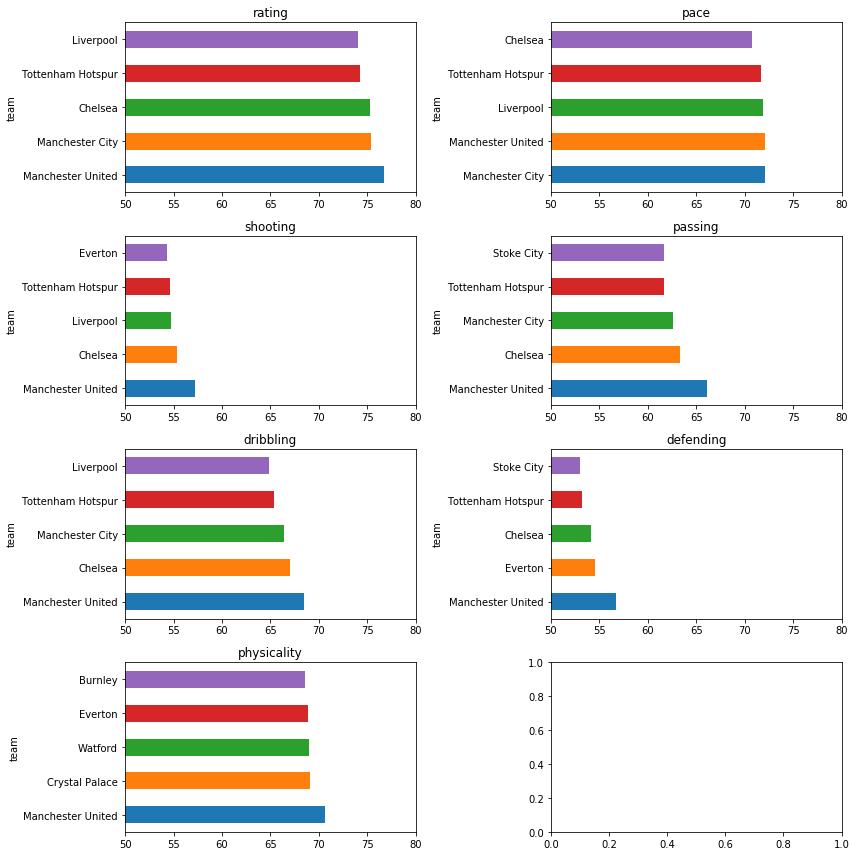

In [45]:
team_18 = team_averages(players_2018)
team_graphs(team_18)

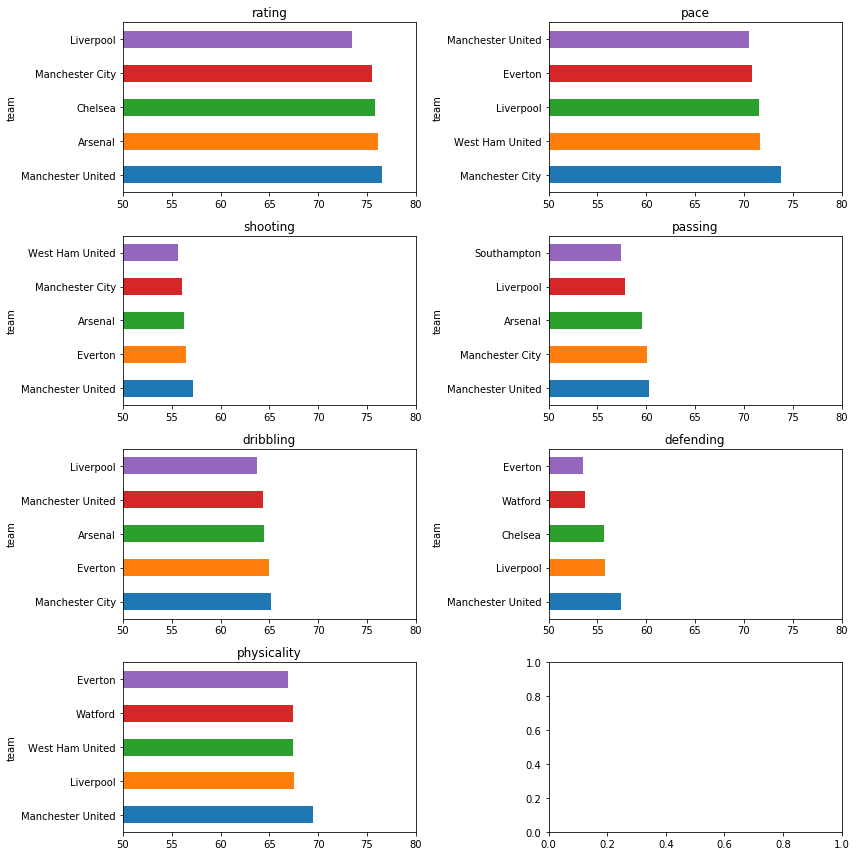

In [46]:
team_17 = team_averages(players_2017)
team_graphs(team_17)

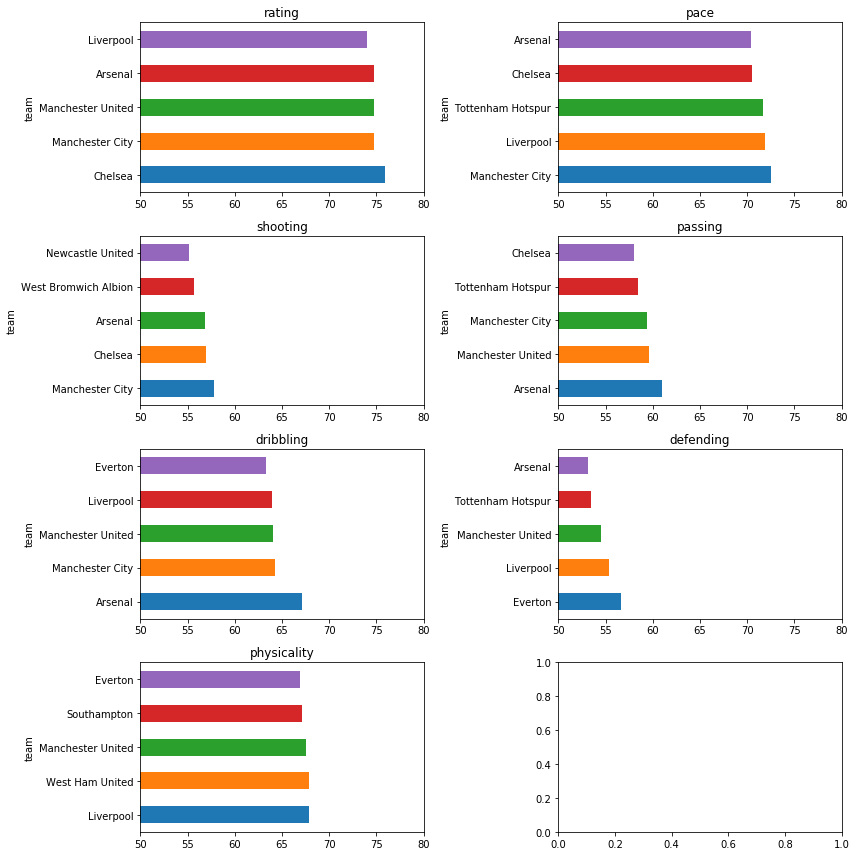

In [47]:
team_16 = team_averages(players_2016)
team_graphs(team_16)

<h1> England Premier League Data </h1>

In [48]:
def scatter_plots(data, dep_column, low_limit = 0, high_limit=150, COL_NUM = 2, ROW_NUM = 4 ):
    import matplotlib.pyplot as plt
    from scipy import stats
    %matplotlib inline
    
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    important_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality', 'rating']
    for i , column in enumerate(important_columns):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        sns.regplot(data[column], data[dep_column], ax=ax)
        ax.set_ybound(low_limit, high_limit)
        ax.set_title(column+ ' Scatterplot')
        ax.set_xlabel(column)
        ax.set_ylabel(dep_column)
    
    plt.tight_layout()
    

<h1> Relationship with Dependent Variable </h1>

<h2> Goalkeeper </h2>

In [49]:
goalkeeper_2019 = pd.read_csv('goalkeeper_2019.csv')
goalkeeper_2018 = pd.read_csv('goalkeeper_2018.csv')
goalkeeper_2017 = pd.read_csv('goalkeeper_2017.csv')
goalkeeper_2016 = pd.read_csv('goalkeeper_2016.csv')

In [50]:
all_gk = goalkeeper_2018.append(goalkeeper_2017, sort=False)
all_gk = all_gk.append(goalkeeper_2016, sort = False)
all_gk = all_gk[all_gk['saves'] > 10 ]

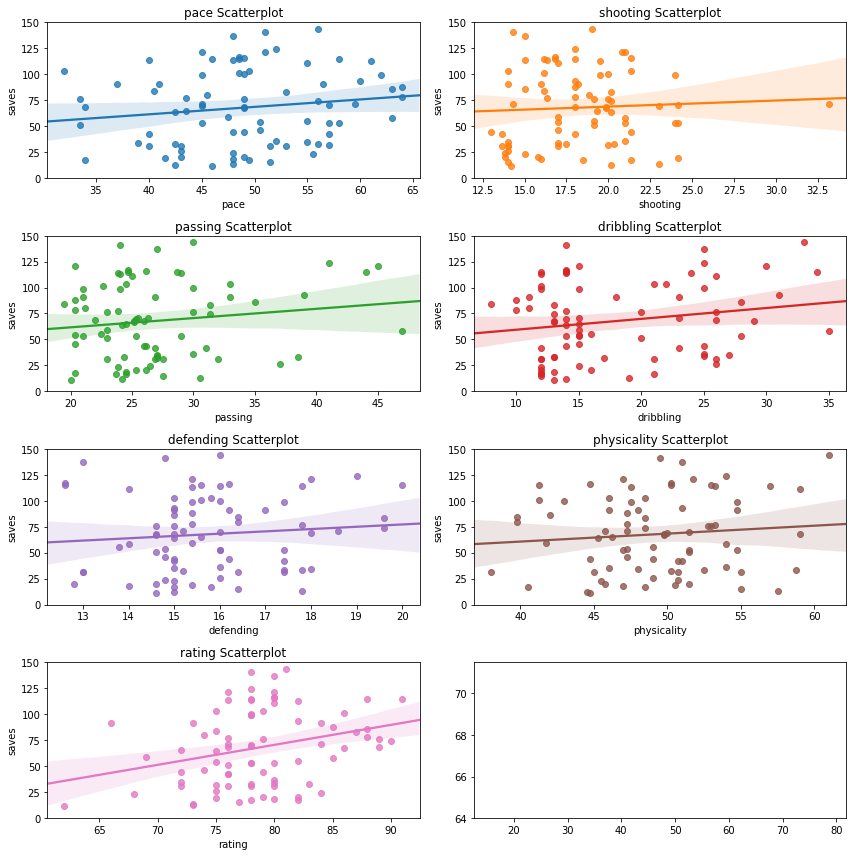

In [51]:
scatter_plots(all_gk, 'saves')

<h2> Defender </h2>

In [52]:
defender_2019 = pd.read_csv('defender_2019.csv')
defender_2018 = pd.read_csv('defender_2018.csv')
defender_2017 = pd.read_csv('defender_2017.csv')
defender_2016 = pd.read_csv('defender_2016.csv')

In [53]:
all_def = defender_2018.append(defender_2017, sort=False)
all_def = all_def.append(defender_2016, sort=False)

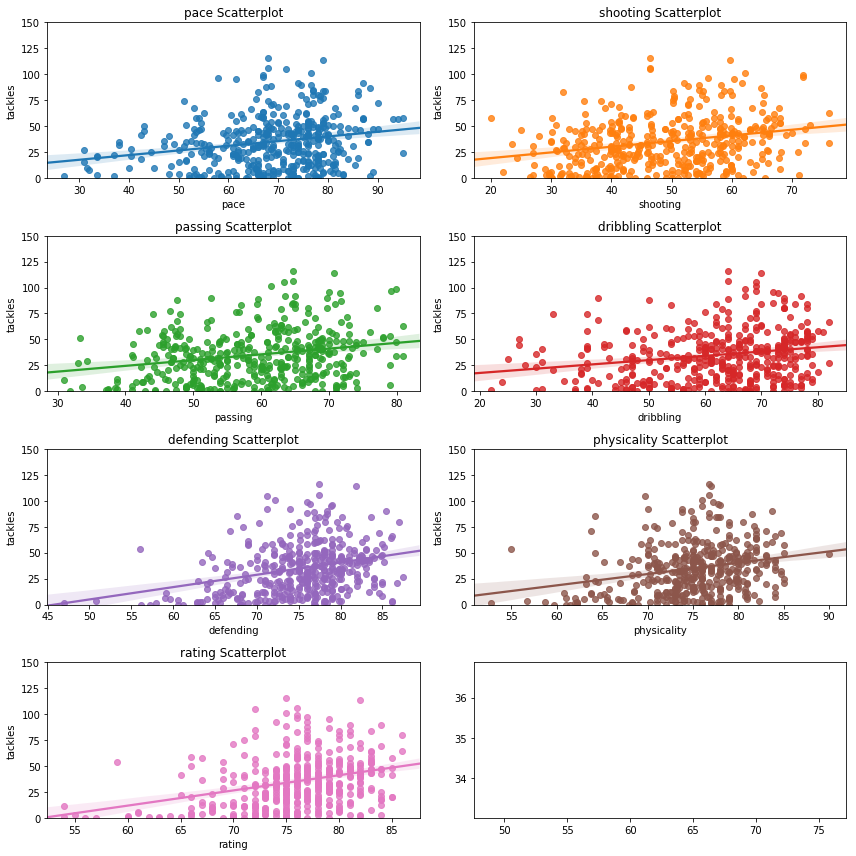

In [54]:
scatter_plots(all_def, 'tackles')

<h2> Midfielder </h2>

In [55]:
midfielder_2019 = pd.read_csv('midfielder_2019.csv')
midfielder_2018 = pd.read_csv('midfielder_2018.csv')
midfielder_2017 = pd.read_csv('midfielder_2017.csv')
midfielder_2016 = pd.read_csv('midfielder_2016.csv')

In [56]:
all_mid = midfielder_2018.append(midfielder_2017, sort=False)
all_mid = all_mid.append(midfielder_2016, sort=False)

In [57]:
all_mid['contribution'] = all_mid['goals']+ all_mid['assists']
all_mid = all_mid[all_mid['contribution']>5]

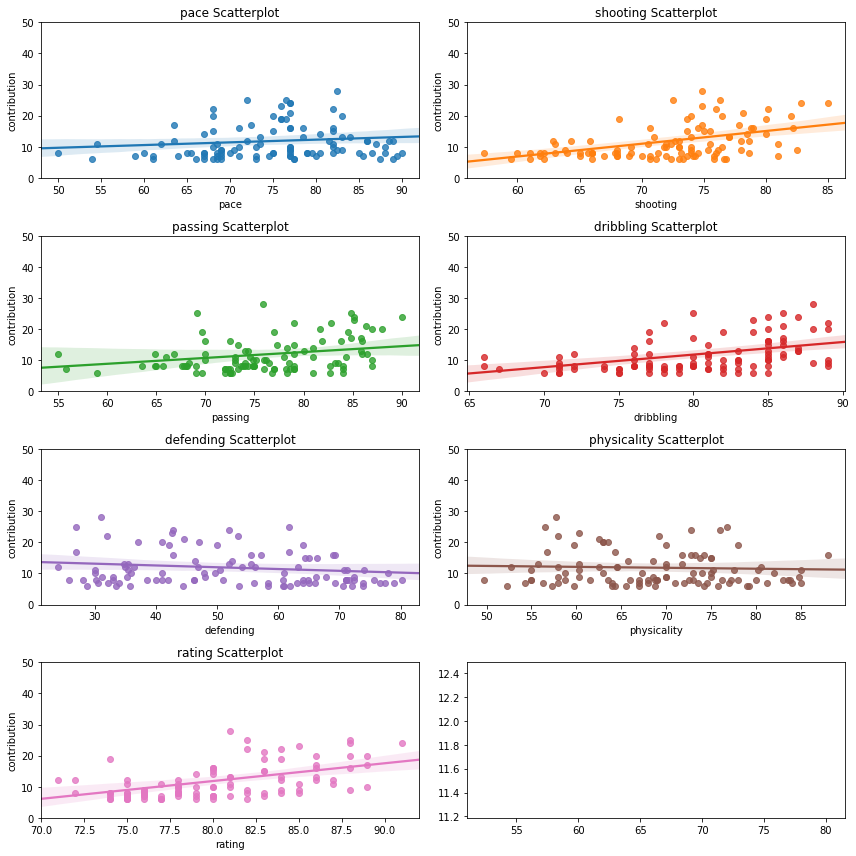

In [58]:
scatter_plots(all_mid, 'contribution', high_limit=50)

<h2> Forward </h2>

In [59]:
forward_2019 = pd.read_csv('forward_2019.csv')
forward_2018 = pd.read_csv('forward_2018.csv')
forward_2017 = pd.read_csv('forward_2017.csv')
forward_2016 = pd.read_csv('forward_2016.csv')

In [60]:
all_fw = forward_2018.append(forward_2017, sort= False)
all_fw = all_fw.append(forward_2016, sort=False)
all_fw = all_fw[all_fw['goals']>3]

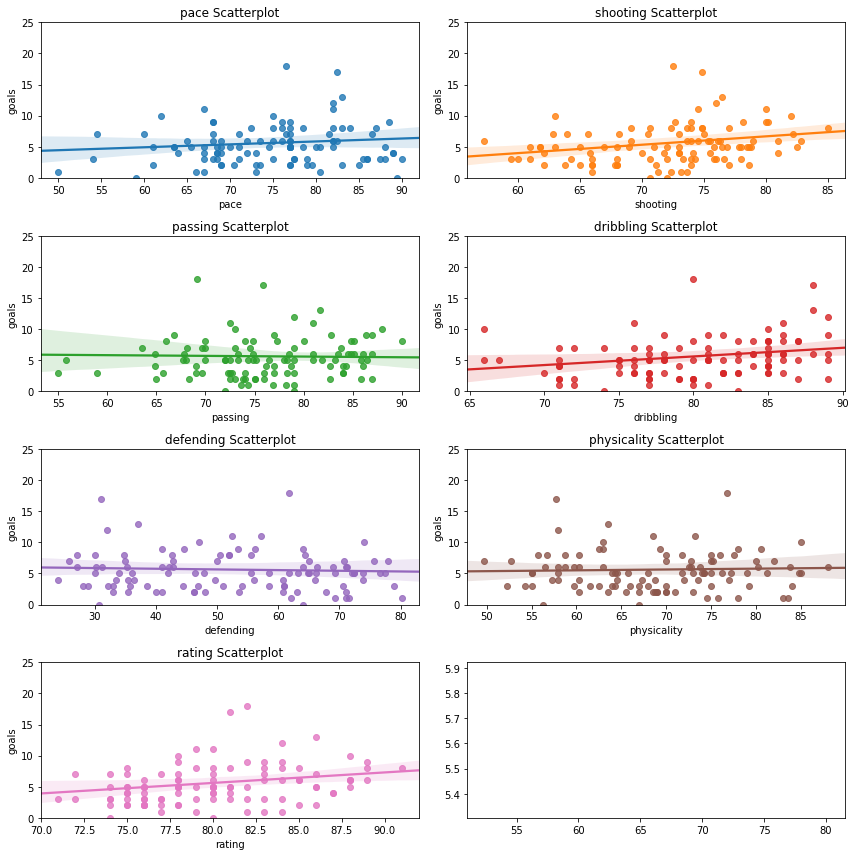

In [61]:
scatter_plots(all_mid, 'goals', high_limit=25)

<h2> Statistics on best players from each season </h2>

In [36]:
#forwards - goals, midfielders - assists, defenders - tackles, goalkeepers - saves
#because it's probably the most appropriate job of their on-field position
#loading data
forward_2019 = pd.read_csv('forward_2019.csv', encoding='ISO-8859-1')
forward_2018 = pd.read_csv('forward_2018.csv', encoding='ISO-8859-1')
forward_2017 = pd.read_csv('forward_2017.csv', encoding='ISO-8859-1')
forward_2016 = pd.read_csv('forward_2016.csv', encoding='ISO-8859-1')
midfielders_2019 = pd.read_csv('midfielder_2019.csv', encoding='ISO-8859-1')
midfielders_2018 = pd.read_csv('midfielder_2018.csv', encoding='ISO-8859-1')
midfielders_2017 = pd.read_csv('midfielder_2017.csv', encoding='ISO-8859-1')
midfielders_2016 = pd.read_csv('midfielder_2016.csv', encoding='ISO-8859-1')
defender_2019 = pd.read_csv('defender_2019.csv', encoding='ISO-8859-1')
defender_2018 = pd.read_csv('defender_2018.csv', encoding='ISO-8859-1')
defender_2017 = pd.read_csv('defender_2017.csv', encoding='ISO-8859-1')
defender_2016 = pd.read_csv('defender_2016.csv', encoding='ISO-8859-1')
goalkeeper_2016 = pd.read_csv('goalkeeper_2016.csv', encoding='ISO-8859-1')
goalkeeper_2017 = pd.read_csv('goalkeeper_2017.csv', encoding='ISO-8859-1')
goalkeeper_2018 = pd.read_csv('goalkeeper_2018.csv', encoding='ISO-8859-1')
goalkeeper_2019 = pd.read_csv('goalkeeper_2019.csv', encoding='ISO-8859-1')

In [31]:
#Forwards that scored the highest number of goals
print("Top goalscorers for the 2019 season")
print(forward_2019[['name', 'team', 'rating', 'goals']].nlargest(10, 'goals'))
print("\n\nTop goalscorers for the 2018 season")
print(forward_2018[['name', 'team', 'rating', 'goals']].nlargest(10, 'goals'))
print("\n\nTop goalscorers for the 2017 season")
print(forward_2017[['name', 'team', 'rating', 'goals']].nlargest(10, 'goals'))
print("\n\nTop goalscorers for the 2016 season")
print(forward_2016[['name', 'team', 'rating', 'goals']].nlargest(10, 'goals'))

Top goalscorers for the 2019 season
   index                       name                      team  rating  goals
0     45             Connor Wickham            Crystal Palace      71   18.0
1      1              Sergio Aguero           Manchester City      89    8.0
2      2  Pierre-Emerick Aubameyang                   Arsenal      88    7.0
3      0                 Harry Kane         Tottenham Hotspur      89    6.0
4     14              Callum Wilson               Bournemouth      79    6.0
5     32               Glenn Murray  Brighton and Hove Albion      76    6.0
6     48           Kazaiah Sterling         Tottenham Hotspur      61    6.0
7      5        Alexandre Lacazette                   Arsenal      84    5.0
8      7           Marko Arnautovic           West Ham United      82    5.0
9      9                     Morata                   Chelsea      82    5.0


Top goalscorers for the 2018 season
                   name                      team  rating  goals
1            H

In [35]:
print("Top assists for the 2019 season")
print(midfielders_2019[['name', 'team', 'rating', 'assists']].nlargest(10, 'assists'))
print("\n\nTop assists for the 2018 season")
print(midfielders_2018[['name', 'team', 'rating', 'assists']].nlargest(10, 'assists'))
print("\n\nTop assists for the 2017 season")
print(midfielders_2017[['name', 'team', 'rating', 'assists']].nlargest(10, 'assists'))
print("\n\nTop assists for the 2016 season")
print(midfielders_2016[['name', 'team', 'rating', 'assists']].nlargest(10, 'assists'))

Top assists for the 2019 season
                   name                      team  rating  assists
59          Ryan Fraser               Bournemouth      77      6.0
21         Aaron Ramsey                   Arsenal      82      4.0
31   Abdoulaye Doucoure                   Watford      81      4.0
2           David Silva           Manchester City      89      3.0
5            Paul Pogba         Manchester United      88      3.0
43         Ross Barkley                   Chelsea      79      3.0
86    Anthony Knockaert  Brighton and Hove Albion      75      3.0
103         Solly March  Brighton and Hove Albion      73      3.0
3           David Silva           Manchester City      89      2.0
6     Christian Eriksen         Tottenham Hotspur      88      2.0


Top assists for the 2018 season
                  name               team  rating  assists
0      Kevin De Bruyne    Manchester City      91     16.0
2          David Silva    Manchester City      89     11.0
5           Paul Pog

In [34]:
print("Top tackles for the 2019 season")
print(defender_2019[['name', 'team', 'rating', 'tackles']].nlargest(10, 'tackles'))
print("\n\nTop tackles for the 2018 season")
print(defender_2018[['name', 'team', 'rating', 'tackles']].nlargest(10, 'tackles'))
print("\n\nTop tackles for the 2017 season")
print(defender_2017[['name', 'team', 'rating', 'tackles']].nlargest(10, 'tackles'))
print("\n\nTop tackles for the 2016 season")
print(defender_2016[['name', 'team', 'rating', 'tackles']].nlargest(10, 'tackles'))

Top tackles for the 2019 season
                 name               team  rating  tackles
19    Ricardo Pereira     Leicester City      81     39.0
61     Matthew Lowton            Burnley      77     28.0
42      Ryan Bertrand        Southampton      79     27.0
14   Shkodran Mustafi            Arsenal      82     26.0
16    Kieran Trippier  Tottenham Hotspur      82     26.0
87     Arthur Masuaku    West Ham United      75     26.0
3         Azpilicueta            Chelsea      86     25.0
12   Andrew Robertson          Liverpool      82     25.0
79       Wesley Hoedt        Southampton      76     25.0
110        Chris Lowe  Huddersfield Town      73     24.0


Top tackles for the 2018 season
                      name                      team  rating  tackles
72          Pablo Zabaleta           West Ham United      76     96.0
119          Kyle Naughton              Swansea City      74     92.0
79   Christopher Schindler         Huddersfield Town      76     83.0
0              A

In [37]:
print("Top goalkeepers for the 2019 season")
print(goalkeeper_2019[['name', 'team', 'rating', 'saves']].nlargest(10, 'saves'))
print("\n\nTop goalkeepers for the 2018 season")
print(goalkeeper_2018[['name', 'team', 'rating', 'saves']].nlargest(10, 'saves'))
print("\n\nTop goalkeepers for the 2017 season")
print(goalkeeper_2017[['name', 'team', 'rating', 'saves']].nlargest(10, 'saves'))
print("\n\nTop goalkeepers for the 2016 season")
print(goalkeeper_2016[['name', 'team', 'rating', 'saves']].nlargest(10, 'saves'))

Top goalkeepers for the 2019 season
                name                      team  rating  saves
9           Joe Hart                   Burnley      79   53.0
8   Lukasz Fabianski           West Ham United      81   51.0
11       Mathew Ryan  Brighton and Hove Albion      79   46.0
0             De Gea         Manchester United      91   42.0
15     Alex McCarthy               Southampton      77   40.0
6    Jordan Pickford                   Everton      83   36.0
13   Martin Dubravka          Newcastle United      78   34.0
10     Asmir Begovic               Bournemouth      79   33.0
17   Wayne Hennessey            Crystal Palace      75   33.0
1        Hugo Lloris         Tottenham Hotspur      88   31.0


Top goalkeepers for the 2018 season
                 name                      team  rating  saves
6        Jack Butland                Stoke City      81  144.0
9    Lukasz Fabianski              Swansea City      80  137.0
17        Mathew Ryan  Brighton and Hove Albion      78